## Install Dependencies

In [1]:
# Need the following when downloading CSVs from AWS S3
# Used the quiet flag to reduce installation output
!pip install --quiet fsspec s3fs

## Import Libraries

In [2]:
import atoti as tt
import pandas as pd
import time
from pprint import pprint

## Load Data Into Pandas DataFrame from CSV

In [3]:
# Load credit card transaction data (2.2 GB) and calculate time to load
# start_time = time.time()
# cc_sales_df = pd.read_csv(
#     "s3://data.atoti.io/notebooks/retail-banking/credit_card_transactions_ibm.csv"
# )
# print("--- %s seconds ---" % (time.time() - start_time))

In [4]:
# cc_sales_df

In [5]:
# Load credit card transaction data (265.5 MB) and calculate time to load
# start_time = time.time()
# cc_sales_df_gzip = pd.read_csv(
#     "s3://data.atoti.io/notebooks/retail-banking/credit_card_transactions_ibm.csv.gz",
#     compression="gzip",
# )
# print("--- %s seconds ---" % (time.time() - start_time))

In [6]:
# Load credit card transaction data
cc_sales_gzip_df = pd.read_csv("credit_card_transactions_ibm.csv.gz", compression="gzip",)
cc_sales_gzip_df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [7]:
# Load user credit card data
user_cc_df = pd.read_csv("sd254_cards_processed.csv", index_col=0)
user_cc_df

,User,CARD INDEX,Retailer ID,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,24,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,25,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,26,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,20,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,17,5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,1,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,1997,2,20,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1998,0,7,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,1999,0,11,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [8]:
# Load user data
users_df = pd.read_csv("s3://data.atoti.io/notebooks/retail-banking/sd254_users.csv")
users_df = users_df.rename_axis("User").reset_index()
users_df

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1


In [9]:
# Load retailer data
cc_info_df = pd.read_csv("s3://data.atoti.io/notebooks/retail-banking/cc_info.csv")
cc_info_df = cc_info_df
cc_info_df

,Retailer ID,Retailer Name,Card Brand,Card Type,Industry
0,1,Cathay Pacific Elite,Amex,Credit,Industrials
1,2,Hilton Honors,Amex,Credit,Consumer Discretionary
2,3,Delta SkyMiles Reserve,Amex,Credit,Industrials
3,4,Marriot Bonvoy Brilliant,Amex,Credit,Consumer Discretionary
4,5,Discover it Miles,Discover,Credit,Financials
5,6,Discover it Secured,Discover,Credit,Financials
6,7,Capital One VentureOne Rewards,Mastercard,Credit,Financials
7,8,Citi / AAdvantage Executive World Elite,Mastercard,Credit,Industrials
8,9,Capital One Quicksilver Cash Rewards,Mastercard,Credit,Financials
9,10,IHG One Rewards Traveler,Mastercard,Credit,Consumer Discretionary


## Format Data for Each DataFrame

In [10]:
# Cast intended hierarchies as strings
cc_sales_gzip_df['User'] = cc_sales_gzip_df['User'].astype(str)
cc_sales_gzip_df['Card'] = cc_sales_gzip_df['Card'].astype(str)
cc_sales_gzip_df['Year'] = cc_sales_gzip_df['Year'].astype(str)
cc_sales_gzip_df['Month'] = cc_sales_gzip_df['Month'].astype(str)
cc_sales_gzip_df['Day'] = cc_sales_gzip_df['Day'].astype(str)
cc_sales_gzip_df['Merchant Name'] = cc_sales_gzip_df['Merchant Name'].astype(str)
cc_sales_gzip_df['Zip'] = cc_sales_gzip_df['Zip'].astype(str)
cc_sales_gzip_df['MCC'] = cc_sales_gzip_df['MCC'].astype(str)

# Cast intended measures as numerical data types
cc_sales_gzip_df['Amount'] = cc_sales_gzip_df['Amount'].str.replace('$', '')
cc_sales_gzip_df['Amount'] = cc_sales_gzip_df['Amount'].astype(float)
cc_sales_gzip_df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,2002,11,10,13:09,-98.00,Swipe Transaction,-1288082279022882052,La Verne,CA,91750.0,5499,NaN,No
196,0,0,2002,11,10,13:12,98.00,Swipe Transaction,-1288082279022882052,La Verne,CA,91750.0,5499,NaN,No
197,0,0,2002,11,10,13:20,52.40,Swipe Transaction,-1288082279022882052,La Verne,CA,91750.0,5499,NaN,No
198,0,0,2002,11,11,06:10,130.48,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,NaN,No


In [11]:
# Rename `CARD INDEX` column to `Card` to match joined `Card` column from cc_sales_gzip_df
user_cc_df.rename(columns={"CARD INDEX": "Card"}, inplace=True)

# Cast intended hierarchies as strings
user_cc_df['User'] = user_cc_df['User'].astype(str)
user_cc_df['Card'] = user_cc_df['Card'].astype(str)
user_cc_df['Retailer ID'] = user_cc_df['Retailer ID'].astype(str)
user_cc_df['Card Number'] = user_cc_df['Card Number'].astype(str)
user_cc_df['CVV'] = user_cc_df['CVV'].astype(str)

# Cast intended measures as numerical data types
user_cc_df['Credit Limit'] = user_cc_df['Credit Limit'].str.replace('$', '')
user_cc_df['Credit Limit'] = user_cc_df['Credit Limit'].astype(int)
user_cc_df

,User,Card,Retailer ID,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,24,4344676511950444,12/2022,623,YES,2,24295,09/2002,2008,No
1,0,1,25,4956965974959986,12/2020,393,YES,2,21968,04/2014,2014,No
2,0,2,26,4582313478255491,02/2024,719,YES,2,46414,07/2003,2004,No
3,0,3,20,4879494103069057,08/2024,693,NO,1,12400,01/2003,2012,No
4,0,4,17,5722874738736011,03/2009,75,YES,1,28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,1,300609782832003,01/2024,663,YES,1,6900,11/2000,2013,No
6142,1997,2,20,4718517475996018,01/2021,492,YES,2,5700,04/2012,2012,No
6143,1998,0,7,5929512204765914,08/2020,237,NO,2,9200,02/2012,2012,No
6144,1999,0,11,5589768928167462,01/2020,630,YES,1,28074,01/2020,2020,No


In [12]:
# Remove $ symbols for currency related numerical values
users_df['Per Capita Income - Zipcode'] = users_df['Per Capita Income - Zipcode'].str.replace('$', '')
users_df['Yearly Income - Person'] = users_df['Yearly Income - Person'].str.replace('$', '')
users_df['Total Debt'] = users_df['Total Debt'].str.replace('$', '')

# Cast intended hierarchies as strings
users_df['User'] = users_df['User'].astype(str)
users_df['Birth Month'] = users_df['Birth Month'].astype(str)
users_df['Zipcode'] = users_df['Zipcode'].astype(str)

# Cast intended measures as numerical data types
users_df['Per Capita Income - Zipcode'] = users_df['Per Capita Income - Zipcode'].astype(int)
users_df['Yearly Income - Person'] = users_df['Yearly Income - Person'].astype(int)
users_df['Total Debt'] = users_df['Total Debt'].astype(int)
users_df['FICO Score'] = users_df['FICO Score'].astype(int)
users_df['Num Credit Cards'] = users_df['Num Credit Cards'].astype(int)
users_df

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,37891,77254,191349,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,22681,33483,196,698,5
3,3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,163145,249925,202328,722,4
4,4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,53797,109687,183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,23550,48010,87837,703,3
1996,1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,24218,49378,104480,740,4
1997,1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,15175,30942,71066,779,3
1998,1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,25336,54654,27241,618,1


In [13]:
# Cast intended hierarchies as strings
cc_info_df['Retailer ID'] = cc_info_df['Retailer ID'].astype(str)

## Validate Number of Intended Hierarchies and Measures

In [14]:
# Set list of DataFrames
df_list = [cc_sales_gzip_df, cc_info_df, user_cc_df, users_df]

# Read through columns and their data types and count up 
# Non-numerical (hierarchical) and numerical (measure) columns
# Then de-duplicate to account for joined columns
def validate_hierarchies(df_list):

    hierarchy_list = []
    measure_list = []
    
    for df in df_list:
        for i in range(len(df.dtypes)):
            column = df.dtypes.index[i]
            datatype = df.dtypes.iloc[i]
        
            if datatype == "object":
                hierarchy_list.append(column)
            else:
                measure_list.append(column)

    dedup_hierarchy_list = set(hierarchy_list)
    dedup_measure_list = set(measure_list)
    
    print(f"Intended number of hierarchies is: {len(dedup_hierarchy_list)}")
    pprint(dedup_hierarchy_list)
    print(f"Intended number of measures is: {len(dedup_measure_list)}")
    pprint(dedup_measure_list)

validate_hierarchies(df_list)

Intended number of hierarchies is: 32
{'Acct Open Date',
 'Address',
 'Birth Month',
 'CVV',
 'Card',
 'Card Brand',
 'Card Number',
 'Card Type',
 'Card on Dark Web',
 'City',
 'Day',
 'Errors?',
 'Expires',
 'Gender',
 'Has Chip',
 'Industry',
 'Is Fraud?',
 'MCC',
 'Merchant City',
 'Merchant Name',
 'Merchant State',
 'Month',
 'Person',
 'Retailer ID',
 'Retailer Name',
 'State',
 'Time',
 'Use Chip',
 'User',
 'Year',
 'Zip',
 'Zipcode'}
Intended number of measures is: 15
{'Amount',
 'Apartment',
 'Birth Year',
 'Cards Issued',
 'Credit Limit',
 'Current Age',
 'FICO Score',
 'Latitude',
 'Longitude',
 'Num Credit Cards',
 'Per Capita Income - Zipcode',
 'Retirement Age',
 'Total Debt',
 'Year PIN last Changed',
 'Yearly Income - Person'}


## Instantiate Atoti Server

In [15]:
# Start an Atoti Server instance
session = tt.Session(
    user_content_storage="./content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"],
)
session.link

http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

## Define and Create Atoti Tables

In [16]:
# Create the credit card transactions table
cc_sales_table = session.create_table(
    "Sales Transactions",
    types={
        "User": tt.type.STRING,
        "Card": tt.type.STRING,
        "Year": tt.type.STRING,
        "Month": tt.type.STRING,
        "Day": tt.type.STRING,
        "Time": tt.type.STRING,
        "Amount": tt.type.FLOAT,
        "Use Chip": tt.type.STRING,	
        "Merchant Name": tt.type.STRING,	
        "Merchant City": tt.type.STRING,
        "Merchant State": tt.type.STRING,
        "Zip": tt.type.STRING,
        "MCC": tt.type.STRING,
        "Errors?": tt.type.STRING,
        "Is Fraud?": tt.type.STRING,
    },
    # default_values={"column": "MY_DEFAULT"},
)

In [17]:
# Create the users table
user_cc_table = session.create_table(
    "User Credit Cards",
    types={
        "User": tt.type.STRING,
        "Card": tt.type.STRING,
        "Retailer ID": tt.type.STRING,
        "Card Number": tt.type.STRING,
        "Expires": tt.type.STRING,
        "CVV": tt.type.STRING,
        "Has Chip": tt.type.STRING,
        "Cards Issued": tt.type.INT,	
        "Credit Limit": tt.type.INT,	
        "Acct Open Date": tt.type.STRING,
        "Year PIN last Changed": tt.type.INT,
        "Card on Dark Web": tt.type.STRING
    },
    #default_values={"Card INDEX": 0 },
)

In [18]:
# Create the user credit card table
users_table = session.create_table(
    "Users",
    types={
        "User": tt.type.STRING,
        "Person": tt.type.STRING,
        "Current Age": tt.type.INT,
        "Retirement Age": tt.type.INT,
        "Birth Year": tt.type.INT,
        "Birth Month": tt.type.STRING,
        "Gender": tt.type.STRING,
        "Address": tt.type.STRING,	
        "Apartment": tt.type.FLOAT,	
        "City": tt.type.STRING,
        "State": tt.type.STRING,
        "Zipcode": tt.type.STRING,
        "Latitude": tt.type.FLOAT,
        "Longitude": tt.type.FLOAT,
        "Per Capita Income - Zipcode": tt.type.INT,
        "Yearly Income - Person": tt.type.INT,
        "Total Debt": tt.type.INT,
        "FICO Score": tt.type.INT,
        "Num Credit Cards": tt.type.INT,
    },
    # default_values={"column": "MY_DEFAULT"},
)

In [19]:
# Create the retailer table
cc_info_table = session.create_table(
    "Credit Card Info",
    types={
        "Retailer ID": tt.type.STRING,
        "Retailer Name": tt.type.STRING,
        "Card Brand": tt.type.STRING,
        "Card Type": tt.type.STRING,
    },
    # default_values={"column": "MY_DEFAULT"},
)

## Load Pandas DataFrame as Atoti Table Objects

In [20]:
cc_sales_table.load_pandas(cc_sales_gzip_df)

In [21]:
users_table.load_pandas(users_df)

In [22]:
user_cc_table.load_pandas(user_cc_df)

In [23]:
cc_info_table.load_pandas(cc_info_df)

## Join Tables

In [24]:
# Join tables
cc_sales_table.join(user_cc_table, (cc_sales_table['User'] == user_cc_table['User']) & (cc_sales_table['Card'] == user_cc_table['Card']))
cc_sales_table.join(users_table, cc_sales_table['User'] == users_table['User'])
user_cc_table.join(cc_info_table, user_cc_table['Retailer ID'] == cc_info_table['Retailer ID'])

In [25]:
# Create Cube from Atoti Table object
cube = session.create_cube(cc_sales_table)

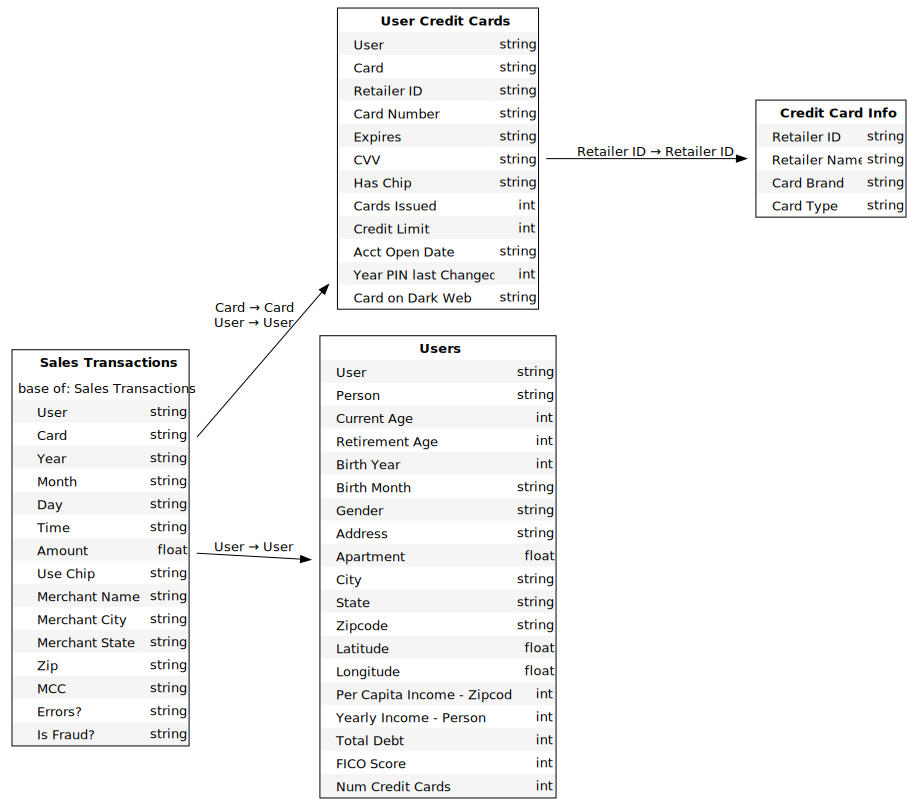

In [26]:
# View the schema
session.tables.schema

In [27]:
# Set variables for hierarchies, levels, and measures
h, l, m = cube.hierarchies, cube.levels, cube.measures

In [28]:
h

{('Sales Transactions', 'Merchant State'): <atoti.hierarchy.Hierarchy object at 0x4b2c2d660>, ('User Credit Cards', 'Card on Dark Web'): <atoti.hierarchy.Hierarchy object at 0x4b2c2d6c0>, ('Sales Transactions', 'Merchant City'): <atoti.hierarchy.Hierarchy object at 0x4b2c2d7b0>, ('Sales Transactions', 'Merchant Name'): <atoti.hierarchy.Hierarchy object at 0x4b2c2d8a0>, ('Sales Transactions', 'User'): <atoti.hierarchy.Hierarchy object at 0x4b2c2d990>, ('Sales Transactions', 'Year'): <atoti.hierarchy.Hierarchy object at 0x4b2c2da80>, ('Users', 'Person'): <atoti.hierarchy.Hierarchy object at 0x4b2c2db70>, ('Users', 'Gender'): <atoti.hierarchy.Hierarchy object at 0x4b2c2dc60>, ('Users', 'State'): <atoti.hierarchy.Hierarchy object at 0x4b2c2dd50>, ('Sales Transactions', 'Use Chip'): <atoti.hierarchy.Hierarchy object at 0x4b2c2de40>, ('User Credit Cards', 'Has Chip'): <atoti.hierarchy.Hierarchy object at 0x4b2c2df30>, ('Users', 'City'): <atoti.hierarchy.Hierarchy object at 0x4b2c2e020>, ('Sales Transactions', 'Is Fraud?'): <atoti.hierarchy.Hierarchy object at 0x4b2c21d20>, ('Credit Card Info', 'Card Type'): <atoti.hierarchy.Hierarchy object at 0x4b2c21750>, ('User Credit Cards', 'Acct Open Date'): <atoti.hierarchy.Hierarchy object at 0x4b2c214b0>, ('Sales Transactions', 'Errors?'): <atoti.hierarchy.Hierarchy object at 0x4b2c20790>, ('Sales Transactions', 'MCC'): <atoti.hierarchy.Hierarchy object at 0x4b2c202b0>, ('Users', 'Address'): <atoti.hierarchy.Hierarchy object at 0x4b2c21ea0>, ('Credit Card Info', 'Card Brand'): <atoti.hierarchy.Hierarchy object at 0x4b2c22440>, ('Sales Transactions', 'Time'): <atoti.hierarchy.Hierarchy object at 0x4b2c22830>, ('User Credit Cards', 'CVV'): <atoti.hierarchy.Hierarchy object at 0x4b2c228f0>, ('Users', 'Zipcode'): <atoti.hierarchy.Hierarchy object at 0x4b2c23070>, ('Credit Card Info', 'Retailer Name'): <atoti.hierarchy.Hierarchy object at 0x4b2c23430>, ('Sales Transactions', 'Card'): <atoti.hierarchy.Hierarchy object at 0x4b2c238b0>, ('User Credit Cards', 'Card Number'): <atoti.hierarchy.Hierarchy object at 0x4b2c23f10>, ('Sales Transactions', 'Month'): <atoti.hierarchy.Hierarchy object at 0x4b2c213f0>, ('Sales Transactions', 'Day'): <atoti.hierarchy.Hierarchy object at 0x4a93622f0>, ('User Credit Cards', 'Retailer ID'): <atoti.hierarchy.Hierarchy object at 0x4a9363df0>, ('Users', 'Birth Month'): <atoti.hierarchy.Hierarchy object at 0x4b2c2d4e0>, ('Sales Transactions', 'Zip'): <atoti.hierarchy.Hierarchy object at 0x4b2c2d330>, ('User Credit Cards', 'Expires'): <atoti.hierarchy.Hierarchy object at 0x4b2c2d2a0>}

In [29]:
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x4b2c2e3e0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x4b2c2ea70>, 'Amount.MEAN': <atoti.measure.Measure object at 0x4b2c2e920>, 'Amount.SUM': <atoti.measure.Measure object at 0x4b2c2eb90>}

In [30]:
#h["Card INDEX"] = {"Card INDEX": user_cc_table["Card INDEX"]}

In [31]:
# Add the remaining measures from the joined tables